# Feature Engineering and Modelling
1. Import packages
2. Load data
3. Modelling

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## 2. Load data

In [2]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## 3. Modelling
We now have a dataset with engineered features, and we're ready to begin training a predictive model. Our focus will be exclusively on training a Random Forest classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Sampling
The first step is to divide our dataset into training and test sets. This approach allows us to mimic real-world scenarios by using the test set to generate predictions without exposing these data points to the model during training. This process is essential for evaluating how well the model can generalize to unseen data.

Typically, 20-30% of the data is allocated for testing. In this example, we will use a 75-25% split for training and testing, respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model Training
In this example, we are working with a Random Forest classifier, which is an ensemble learning algorithm. The "forest" in Random Forest refers to a collection of Decision Trees, which are tree-based learning models. As the data scientist, you can determine the size of the forest by specifying the number of decision trees to include.

Ensemble algorithms are powerful because they leverage the principles of averaging, weak learners, and the central limit theorem. A single decision tree, when trained on a sample of data with specific parameters, may either overfit or underfit the data. In such cases, relying solely on that one model can be limiting.

With ensemble methods, instead of depending on a single model, we can train thousands of decision trees, each using different data splits and capturing unique patterns. Think of it as teaching coding to 1,000 individuals—each would approach the task with different perspectives and solutions. This is where the concept of weak learners comes into play. If each learner focuses on identifying basic patterns without overfitting and we combine the outputs of these weak learners, the ensemble can form a highly predictive and robust model. This illustrates the idea that many minds working together are more effective than one.

Rather than relying on a single decision tree for predictions, Random Forest aggregates the insights from its entire collection of trees. Some ensemble methods use voting to determine the best prediction, while others employ averaging. As the number of learners increases, the Random Forest's performance tends to converge toward its optimal predictive capability.

#### Advantages of Random Forest Classifier:
1. The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
2. It is able to handle non-linear parameters better than linear based models

#### Disadvantages of Random Forest Classifier:
1. The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
2. Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
model = RandomForestClassifier(
    n_estimators=500
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

The scikit-learn documentation provides extensive details about the Random Forest algorithm and the various parameters you can configure when training a model: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In this example, I have set n_estimators = 500, meaning the Random Forest will consist of 500 decision trees. While there are numerous parameters that can be fine-tuned to optimize the model, exploring the best combination often involves manual experimentation, trial, and error—a process that will not be covered in this notebook.

#### Evaluation
Next, we’ll evaluate the performance of our trained model on the test dataset. To do this, we will use three key metrics:
1. Accuracy: The proportion of correctly predicted observations out of the total observations.
2. Precision: The model’s ability to avoid incorrectly labeling negative samples as positive.
3. Recall: The model’s ability to correctly identify all positive samples.

While accuracy is a common evaluation metric, it isn’t always sufficient on its own, which is why we include precision and recall for a more comprehensive assessment

In [8]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

In [9]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 19
False positives: 2
True negatives: 3284
False negatives: 347

Accuracy: 0.9044359255202629
Precision: 0.9047619047619048
Recall: 0.05191256830601093


Here are some key observations from the results:

<b>Note:</b> If you run this notebook yourself, your results might vary slightly.

- Churn Distribution: About 10% of the test dataset represents churners (churn = 1).
- True Negatives: Out of all the negative cases (churn = 0), the model correctly identified 3,284 out of 3,286 as negative. This is excellent performance!
- False Negatives: These occur when the model predicts a client will not churn (churn = 0) when, in reality, they do (churn = 1). This number is quite high at 347, indicating room for improvement, as reducing false negatives is crucial.
- False Positives: These represent cases where the model predicts a client will churn when they actually do not. There are only 2 such cases, which is a strong result.
- True Positives: Out of the 366 clients in the test dataset who actually churned, the model correctly identified only 19. This is a poor result and a significant weakness of the model.

#### Performance Metrics:
- Accuracy: Although the accuracy score is high, it is misleading because it doesn’t capture the imbalance in the dataset or the model’s inability to detect churners effectively.
- Precision: At 0.90, the precision is decent, indicating the model is relatively good at avoiding false positives.
- Recall: The recall is very low, showing the model struggles to correctly identify positive (churn) cases. This is the primary area for improvement.

#### Summary:
The model performs well at identifying non-churning clients but fails to predict cases where clients do churn. A high percentage of churners are incorrectly classified as non-churners. This suggests that the current features are not discriminative enough to separate churners from non-churners effectively.

At this stage, a data scientist would likely revisit feature engineering to create more predictive features or refine existing ones. They might also optimize the model’s parameters to improve performance. For now, let's explore the model further to gain deeper insights.

### Model Understanding
An easy way to interpret a model's results is by examining feature importances. These provide insight into how significant each feature is in making predictions. While there are various methods to calculate feature importance, the Random Forest classifier offers a built-in approach. In this case, feature importance reflects how often each feature is used to split the data across all decision trees in the forest.

In [10]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

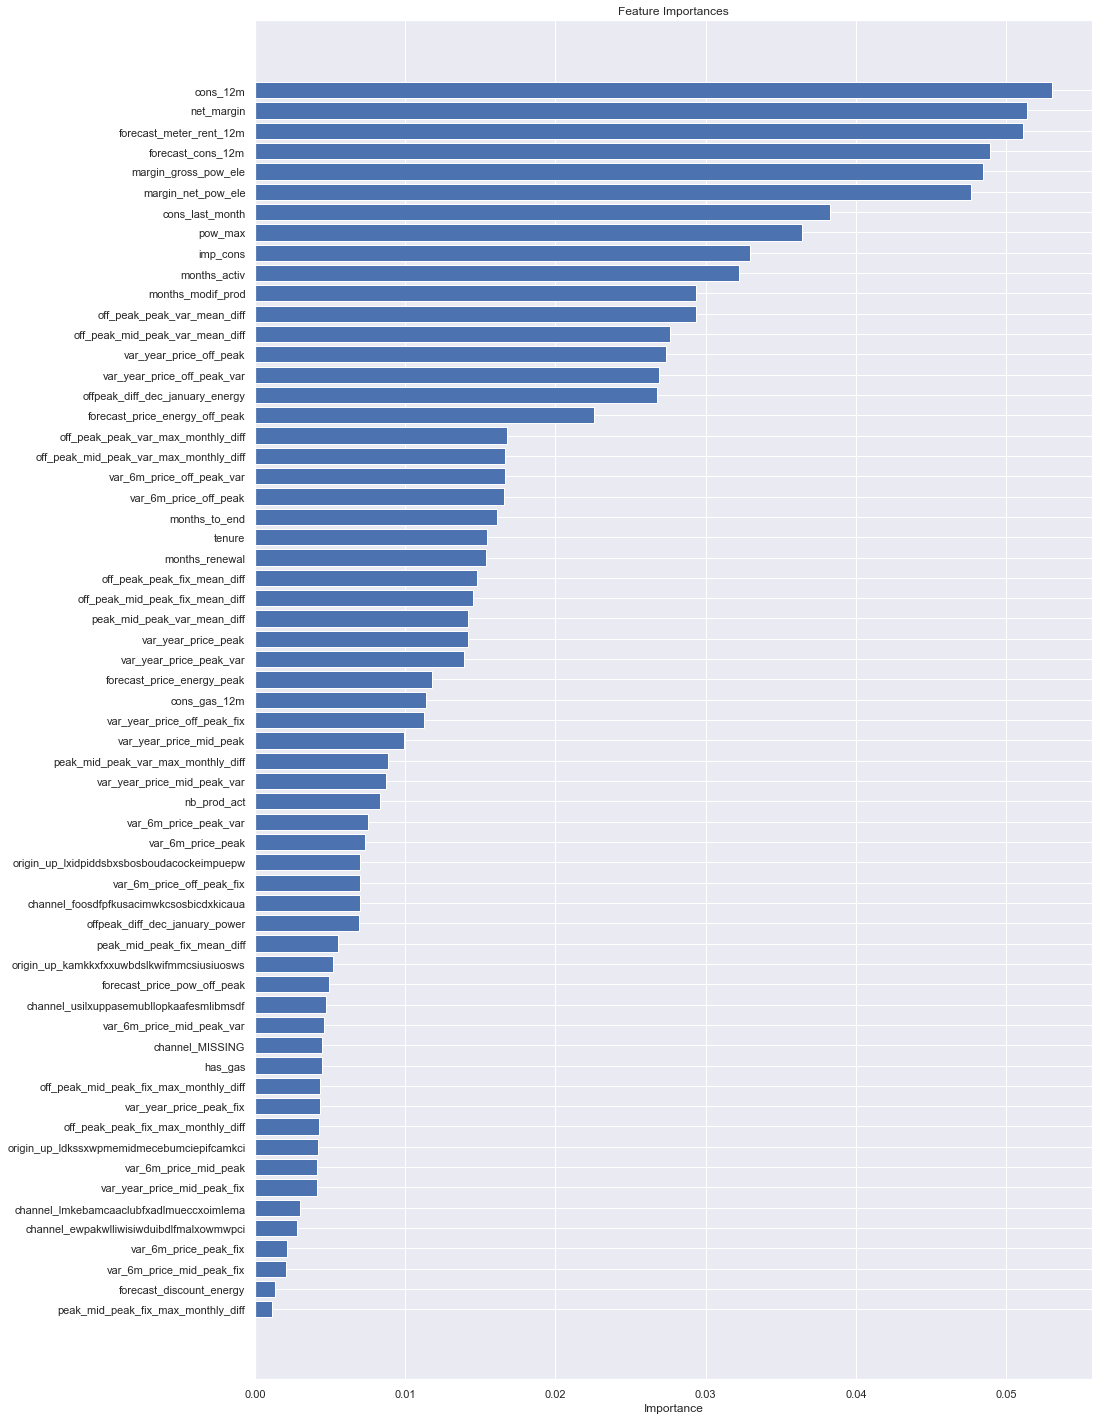

In [11]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From the chart, we can draw the following insights:

- <b>Key Drivers:</b> Net margin and consumption over 12 months emerge as the most significant factors influencing churn in this model.
- <b>Subscription Margin:</b> The margin on power subscriptions is also a key contributor.
- <b>Time-Related Factors:</b> Time plays an important role, including features such as the number of months a customer has been active, their tenure, and the time since their contract was last updated.
- <b>Colleague's Suggested Feature:</b> The feature recommended by our colleague ranks in the top half in terms of influence, with some derivative features performing even better.
- <b>Price Sensitivity:</b> Although price sensitivity features are present, they are not the primary drivers of churn.

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [12]:
probability_predictions = model.predict_proba(X_test)
probabilities = probability_predictions[:, 1]

In [13]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [14]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')